#### BOSTON MARATHON
##### Content
###### 0.Import library & Utils
###### 1.Descriptive analysis
###### 2.Apply clustering algorithm
###### 3.Finding characteristic


#### 0.IMPORT LIBRARY & UTILS

In [1]:
!pip install kmodes

In [126]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from kmodes.kprototypes import KPrototypes
from statistics import mode 

In [105]:
def origin_grp(x):
  if x in origin1:
    return "g1"
  elif x in origin2:
    return "g2"
  elif x in origin3:
    return "g3"
  elif x in origin4:
    return "g4"

def age_group(x):
  if int(x)<18:
    return "<18"
  elif int(x)>=18 and int(x)<=25:
    return "18-25"
  elif int(x)>25 and int(x)<=40:
    return "26-40"
  elif int(x)>40 and int(x)<=70:
    return "41-70"
  elif int(x)>70:
    return ">70"  

#### 1. DESCRIPTIVE ANANLYSIS

In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/llimllib/bostonmarathon/master/results/2014/results.csv")
print("Data have number of row     :",df.shape[0])
print("Data have number of columns :",df.shape[1])

Data have number of row     : 31984
Data have number of columns : 21


In [5]:
df.to_csv('result_2014.csv')

In [6]:
df.head(5)

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,71.40,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,116.37,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,67.42,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,116.37,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,67.83,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [7]:
numeric = ['10k','25k','age','official','35k','overall','pace','30k','5k','half','20k','40k']
df[numeric] = df[numeric].apply(pd.to_numeric, errors = 'coerce', axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   10k        31934 non-null  float64
 1   name       31984 non-null  object 
 2   division   31984 non-null  int64  
 3   25k        31768 non-null  float64
 4   gender     31984 non-null  object 
 5   age        31984 non-null  float64
 6   official   31984 non-null  float64
 7   bib        31984 non-null  object 
 8   genderdiv  31984 non-null  int64  
 9   ctz        1244 non-null   object 
 10  35k        31950 non-null  float64
 11  overall    31984 non-null  float64
 12  pace       31984 non-null  float64
 13  state      29408 non-null  object 
 14  30k        31944 non-null  float64
 15  5k         31932 non-null  float64
 16  half       31912 non-null  float64
 17  20k        31933 non-null  float64
 18  country    31984 non-null  object 
 19  city       31983 non-null  object 
 20  40k   

In [9]:
df.isnull().sum()/(df.shape[0])

10k          0.001563
name         0.000000
division     0.000000
25k          0.006753
gender       0.000000
age          0.000000
official     0.000000
bib          0.000000
genderdiv    0.000000
ctz          0.961106
35k          0.001063
overall      0.000000
pace         0.000000
state        0.080540
30k          0.001251
5k           0.001626
half         0.002251
20k          0.001595
country      0.000000
city         0.000031
40k          0.001219
dtype: float64

##### Remark
###### + Drop column ctz
###### + Drop null value row for city, state

In [10]:
drop_missing_row = ['city','state','10k','25k','35k','30k','5k','half','20k','40k']
for c in drop_missing_row:
  df.drop(df[df[c].isnull()].index, inplace=True)
df.drop(['ctz','name','bib'],axis=1,inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29103 entries, 9 to 31983
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   10k        29103 non-null  float64
 1   division   29103 non-null  int64  
 2   25k        29103 non-null  float64
 3   gender     29103 non-null  object 
 4   age        29103 non-null  float64
 5   official   29103 non-null  float64
 6   genderdiv  29103 non-null  int64  
 7   35k        29103 non-null  float64
 8   overall    29103 non-null  float64
 9   pace       29103 non-null  float64
 10  state      29103 non-null  object 
 11  30k        29103 non-null  float64
 12  5k         29103 non-null  float64
 13  half       29103 non-null  float64
 14  20k        29103 non-null  float64
 15  country    29103 non-null  object 
 16  city       29103 non-null  object 
 17  40k        29103 non-null  float64
dtypes: float64(12), int64(2), object(4)
memory usage: 4.2+ MB


In [12]:
df.describe()

,10k,division,25k,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k
count,29103.000000,29103.000000,29103.000000,29103.000000,29103.000000,29103.000000,29103.000000,29103.000000,29103.000000,29103.000000,29103.000000,29103.000000,29103.000000,29103.000000
mean,51.827082,1966.941037,134.107068,42.054256,242.813434,8008.425935,196.771704,15980.928942,9.269305,164.525433,25.779254,111.639899,105.728655,229.037616
std,8.704309,1732.202728,25.627832,11.348288,50.921669,4733.455790,40.869530,9169.893647,1.942165,32.965134,4.207013,20.333671,19.186131,48.164805
min,17.120000,1.000000,48.550000,18.000000,84.820000,1.000000,70.830000,1.000000,3.250000,59.770000,8.020000,40.200000,38.020000,80.180000
25%,45.580000,623.500000,115.920000,33.000000,205.980000,3954.500000,167.550000,8074.500000,7.870000,141.075000,22.730000,97.180000,92.070000,194.280000
50%,50.430000,1445.000000,129.230000,42.000000,232.570000,7923.000000,188.400000,15997.000000,8.880000,157.980000,25.150000,108.020000,102.350000,219.120000
75%,57.200000,2703.500000,148.430000,50.000000,273.310000,11908.500000,220.270000,23946.000000,10.430000,183.125000,28.500000,123.200000,116.650000,257.780000
max,112.380000,6979.000000,289.020000,81.000000,538.880000,17575.000000,449.330000,31931.000000,20.570000,376.380000,86.950000,236.670000,224.350000,508.350000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


===========Distribution for age============


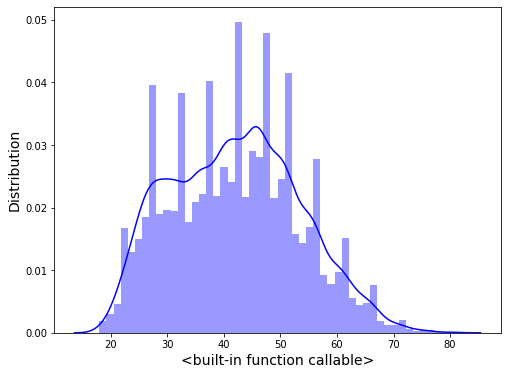

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


===========Distribution for pace============


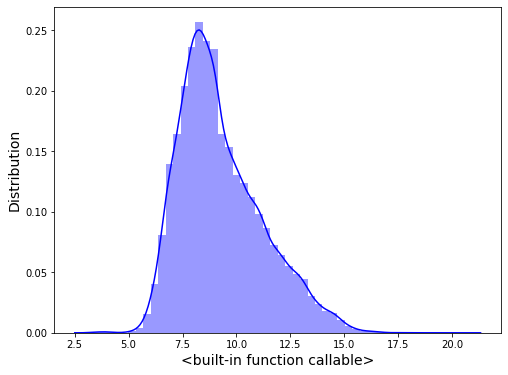

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


===========Distribution for 5k============


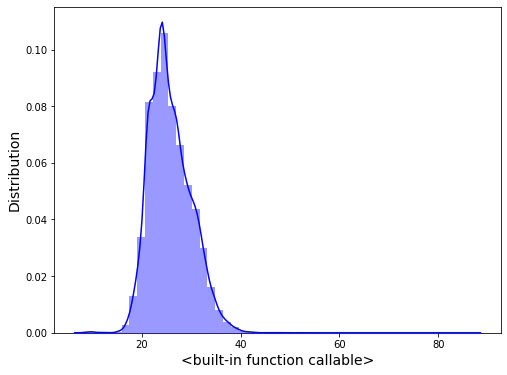

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


===========Distribution for 10k============


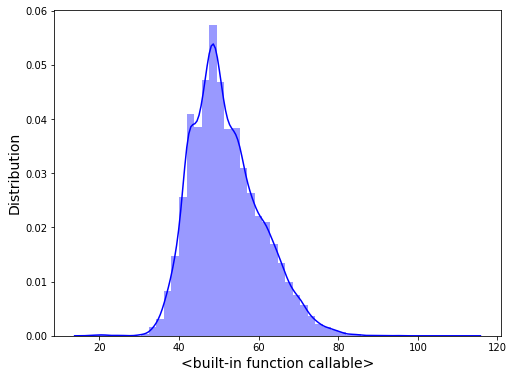

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


===========Distribution for 20k============


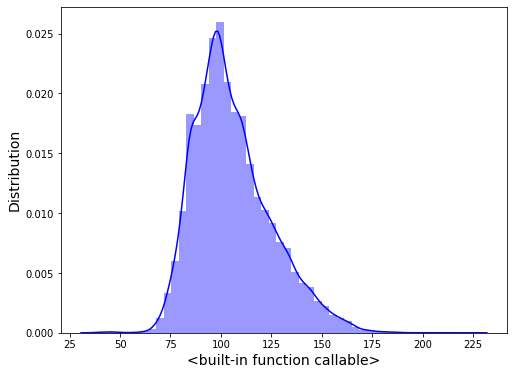

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


===========Distribution for 25k============


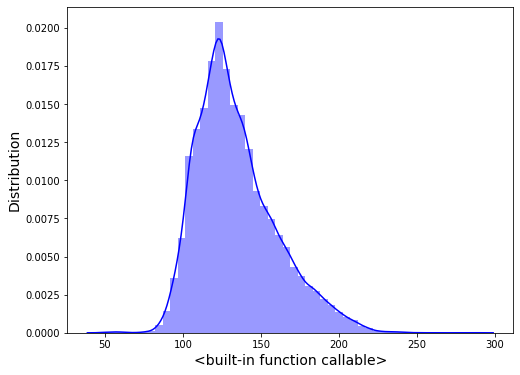

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


===========Distribution for 30k============


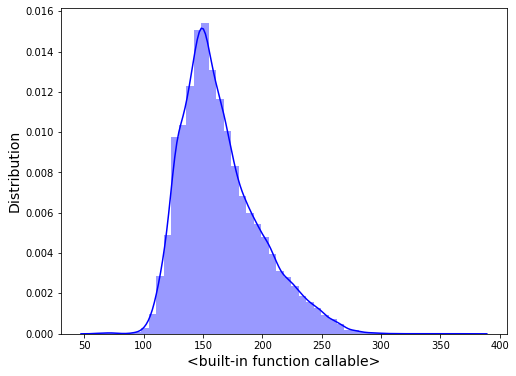

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


===========Distribution for 35k============


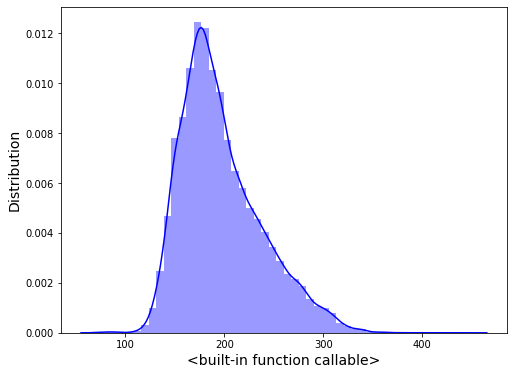

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


===========Distribution for 40k============


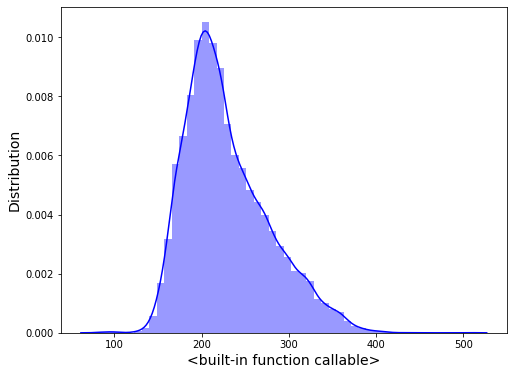

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


===========Distribution for official============


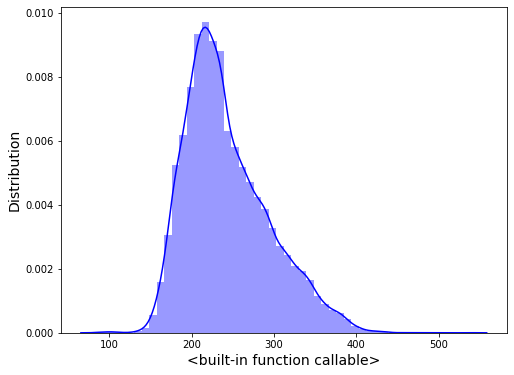

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


===========Distribution for overall============


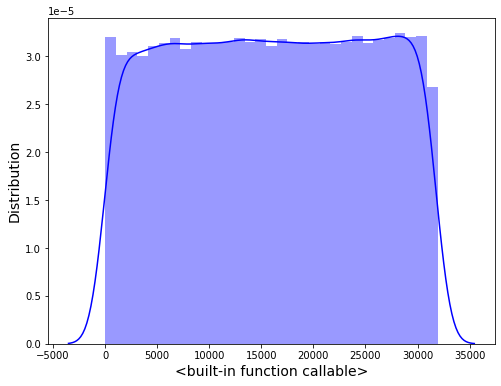

In [13]:
plot_dist = ['age','pace','5k','10k','20k','25k','30k','35k','40k','official','overall']
for c in plot_dist:
  plt.figure(figsize=(8,6))
  hage = sns.distplot(df[c], color='b')
  hage.set_xlabel(callable,fontdict= {'size':14})
  hage.set_ylabel(u'Distribution',fontdict= {'size':14})
  print('===========Distribution for '+ c +'============')
  plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


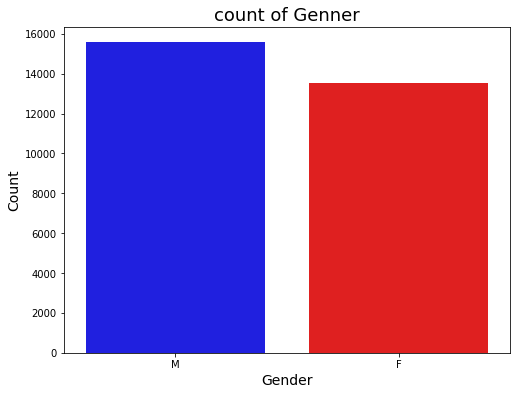

In [14]:
plt.figure(figsize=(8,6))
hage = sns.countplot(df.gender, palette={'F':'r','M':'b'})
hage.set_xlabel('Gender',fontdict= {'size':14})
hage.set_ylabel(u'Count',fontdict= {'size':14})
hage.set_title(u'count of Genner',fontsize=18)
plt.show()

In [15]:
df["country"].value_counts()

USA    26939
CAN     2164
Name: country, dtype: int64

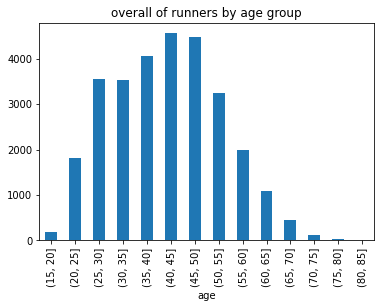

In [16]:
df['overall'].groupby(pd.cut(df['age'], range(15,90,5))).aggregate(len).plot(kind="bar", title="overall of runners by age group")

#### 2. APPLY CLUSTERING

###### One hot encode & Scaling

In [17]:
scaler = MinMaxScaler(feature_range= (0,1))

In [18]:
df.describe(include=['O'])

,gender,state,country,city
count,29103,29103,29103,29103
unique,2,68,2,4648
top,M,MA,USA,Boston
freq,15578,7427,26939,1018


            counts
count  4648.000000
mean      6.261403
std      23.194073
min       1.000000
25%       1.000000
50%       2.000000
75%       4.000000
max    1018.000000


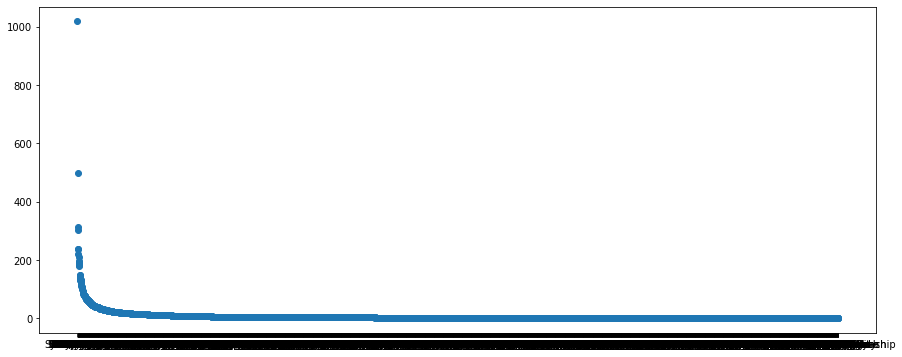

,unique_values,counts
0,Boston,1018
1,New York,497
2,Chicago,312
3,Cambridge,303
4,Somerville,239
5,Toronto,239
6,Brookline,219
7,Washington,209
8,Newton,195
9,San Francisco,192


In [19]:
temp_df = df['city'].value_counts().rename_axis('unique_values').reset_index(name='counts')
temp_df1 = temp_df
print(temp_df1.describe())
plt.figure(figsize=(15,6))
plt.scatter(temp_df1['unique_values'],temp_df1['counts'])
plt.show()
temp_df1.head(20)

In [20]:
temp_df = df
temp_df1 = temp_df['city'].value_counts().rename_axis('unique_values').reset_index(name='counts')
origin1 = list(temp_df1[temp_df1['counts']<=50]['unique_values'])
origin2 = list(temp_df1[(temp_df1['counts']>50) & (temp_df1['counts']<=100)]['unique_values'])
origin3 = list(temp_df1[(temp_df1['counts']>100) & (temp_df1['counts']<=200)]['unique_values'])
origin4 = list(temp_df1[temp_df1['counts']>200]['unique_values'])
df['city_group'] = df['city'].apply(lambda x:origin_grp(x))

In [21]:
# CLONE DATASET
df_clone = df

===========Boxplot Gender vs pace===========
===========Boxplot Gender vs 5k===========
===========Boxplot Gender vs 10k===========
===========Boxplot Gender vs 20k===========
===========Boxplot Gender vs 25k===========
===========Boxplot Gender vs 30k===========
===========Boxplot Gender vs 35k===========
===========Boxplot Gender vs 40k===========


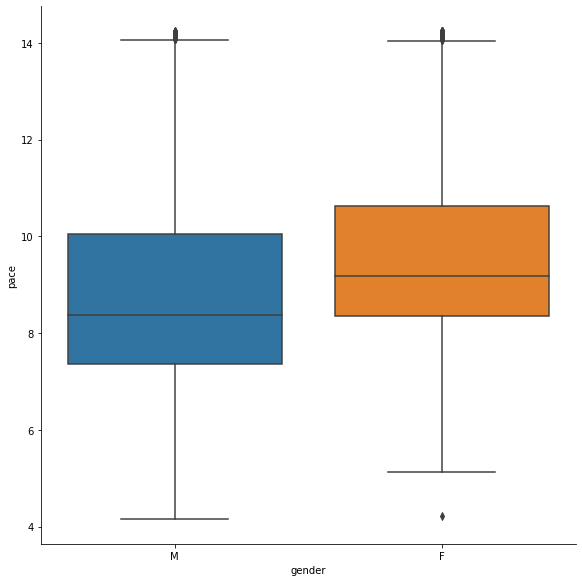

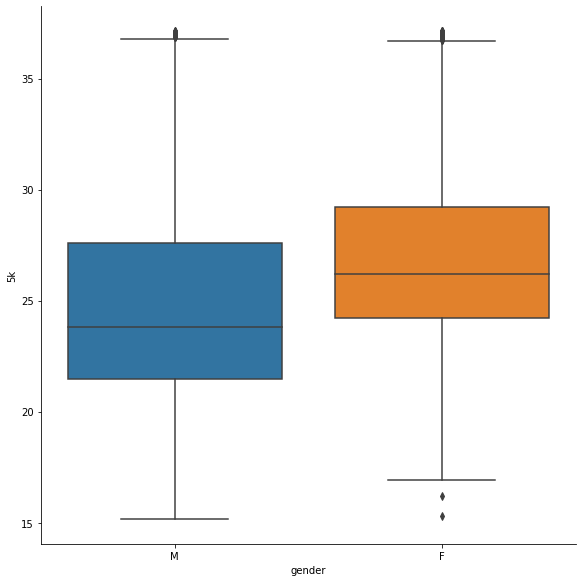

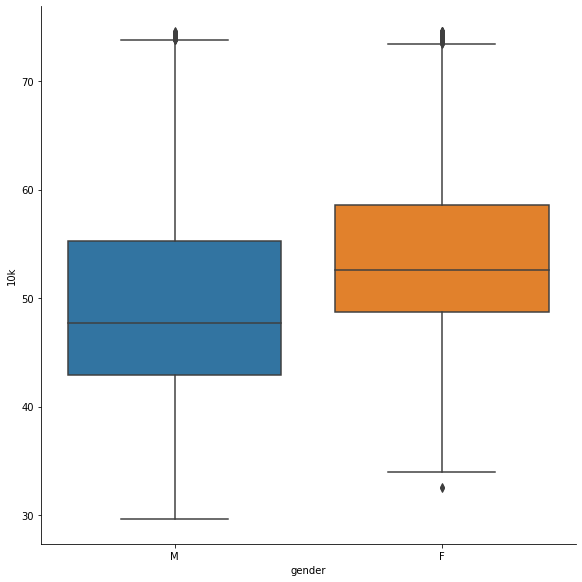

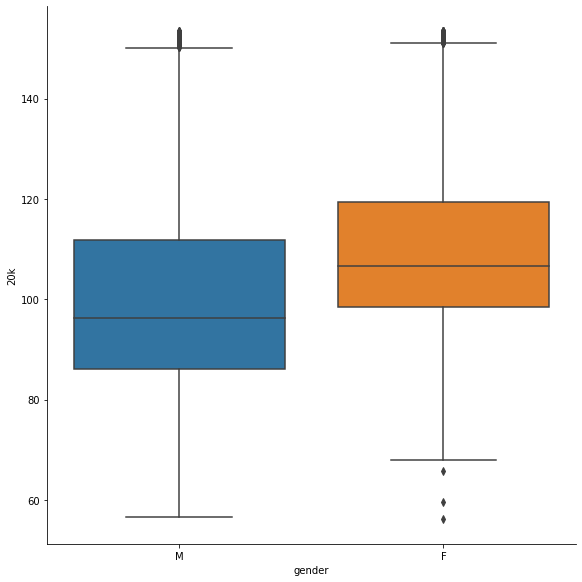

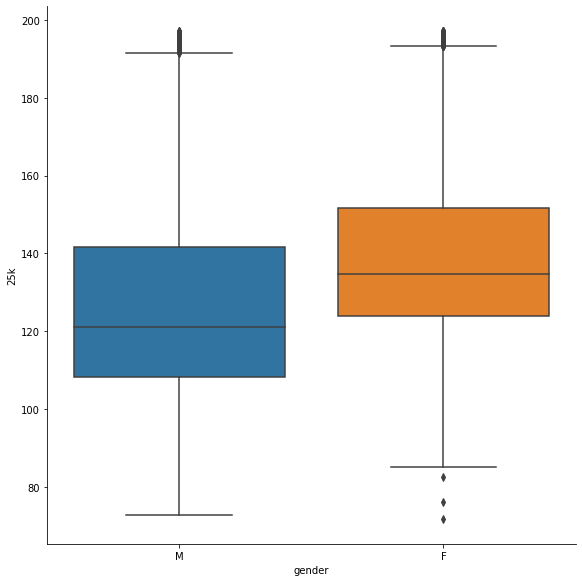

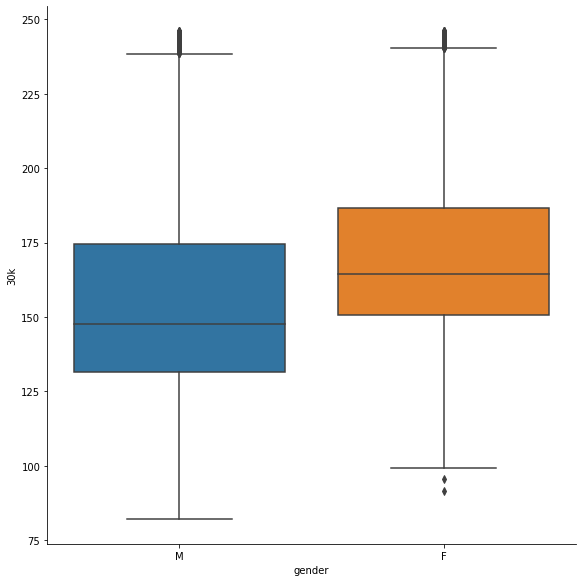

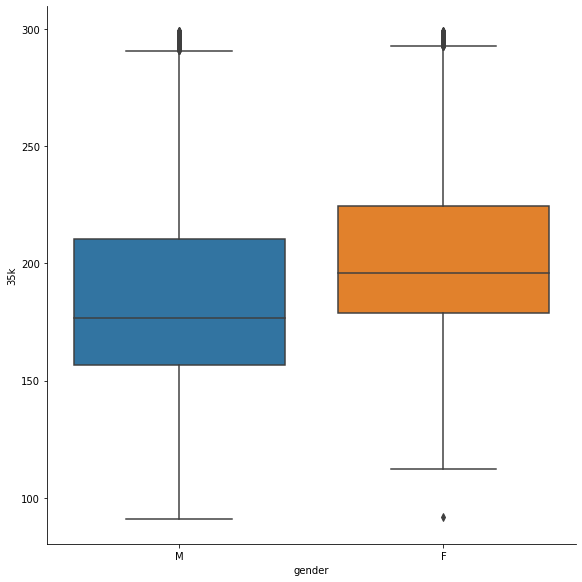

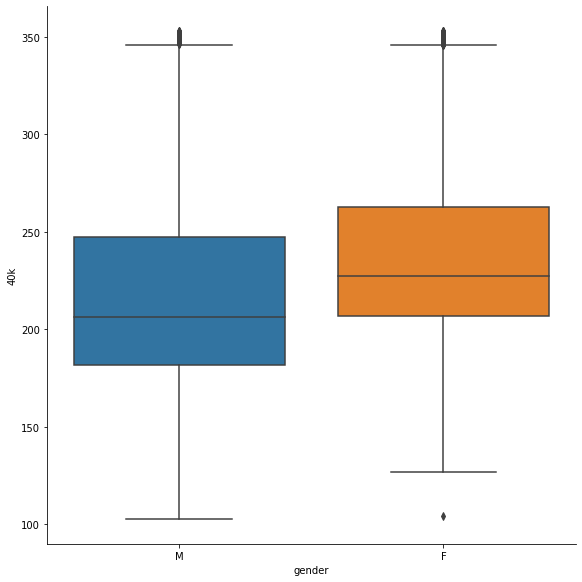

In [24]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_new = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_new

rm_outlier_list = ['pace','5k','10k','20k','25k','30k','35k','40k']
for i in rm_outlier_list:
  df_new = remove_outlier(df,i)
  print('==========='+"Boxplot Gender vs "+i+"===========")
  sns.catplot(x=df_new['gender'],y=df_new[i],data=df_new,height=8,kind='box')

In [25]:
df_new.columns

Index(['10k', 'division', '25k', 'gender', 'age', 'official', 'genderdiv',
       '35k', 'overall', 'pace', 'state', '30k', '5k', 'half', '20k',
       'country', 'city', '40k', 'city_group'],
      dtype='object')

In [26]:
dfgender= pd.get_dummies(df_new.gender)
# dfcountry = pd.get_dummies(df.country)
dfstate = pd.get_dummies(df_new.state)
dfcity_group = pd.get_dummies(df_new.city_group)
df_new.drop(['country','gender','state','city','city_group'],axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [27]:
df_new.columns

Index(['10k', 'division', '25k', 'age', 'official', 'genderdiv', '35k',
       'overall', 'pace', '30k', '5k', 'half', '20k', '40k'],
      dtype='object')

In [28]:
df_scale = scaler.fit_transform(df_new)
df_scale

array([[0.10716232, 0.00278838, 0.11714109, ..., 0.12938168, 0.13089959,
        0.10909309],
       [0.1447727 , 0.00132081, 0.16262376, ..., 0.1778998 , 0.1795217 ,
        0.13559796],
       [0.12994658, 0.00088054, 0.14653465, ..., 0.16112532, 0.16289199,
        0.12573846],
       ...,
       [0.41807478, 0.76753742, 0.60810644, ..., 0.6208816 , 0.61830852,
        0.65384001],
       [0.46985719, 0.85104197, 0.67493812, ..., 0.66947495, 0.67033576,
        0.73195753],
       [0.35953341, 0.20472557, 0.47196782, ..., 0.49721679, 0.49714919,
        0.45497365]])

In [29]:
df_new[['10k', 'division', '25k', 'age', 'official', 'genderdiv',
        '35k','overall', 'pace', '30k', '5k', 'half', '20k', '40k']] = df_scale
df_new = df_new.join(dfgender)
df_new = df_new.join(dfstate)
df_new = df_new.join(dfcity_group)
df_new.head(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,10k,division,25k,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k,F,M,AA,AB,AE,AK,AL,AP,AR,AZ,BC,CA,CO,CT,DC,DE,FL,GA,GU,HI,IA,ID,IL,IN,KS,KY,...,MS,MT,NB,NC,ND,NE,NH,NJ,NL,NM,NS,NT,NV,NY,OH,OK,ON,OR,PA,PE,PR,QC,RI,SC,SD,SK,TN,TX,UT,VA,VT,WA,WI,WV,WY,YT,g1,g2,g3,g4
9,0.107162,0.002788,0.117141,0.206349,0.103953,0.001090,0.094904,0.000601,0.103993,0.102935,0.067775,0.129382,0.130900,0.109093,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
15,0.144773,0.001321,0.162624,0.190476,0.125452,0.000516,0.127628,0.001424,0.125348,0.143159,0.090756,0.177900,0.179522,0.135598,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
34,0.129947,0.000881,0.146535,0.222222,0.118828,0.000344,0.114158,0.001139,0.118849,0.126953,0.081407,0.161125,0.162892,0.125738,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
37,0.107598,0.002201,0.116522,0.269841,0.097825,0.000860,0.088854,0.000475,0.097493,0.097867,0.068034,0.129758,0.131296,0.102467,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
39,0.107162,0.000000,0.106745,0.317460,0.071332,0.000000,0.069952,0.000000,0.071495,0.083879,0.067775,0.122762,0.125356,0.077120,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [30]:
df_new.shape

(28624, 88)

In [31]:
df_new.columns

Index(['10k', 'division', '25k', 'age', 'official', 'genderdiv', '35k',
       'overall', 'pace', '30k', '5k', 'half', '20k', '40k', 'F', 'M', 'AA',
       'AB', 'AE', 'AK', 'AL', 'AP', 'AR', 'AZ', 'BC', 'CA', 'CO', 'CT', 'DC',
       'DE', 'FL', 'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA',
       'MA', 'MB', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NB', 'NC', 'ND',
       'NE', 'NH', 'NJ', 'NL', 'NM', 'NS', 'NT', 'NV', 'NY', 'OH', 'OK', 'ON',
       'OR', 'PA', 'PE', 'PR', 'QC', 'RI', 'SC', 'SD', 'SK', 'TN', 'TX', 'UT',
       'VA', 'VT', 'WA', 'WI', 'WV', 'WY', 'YT', 'g1', 'g2', 'g3', 'g4'],
      dtype='object')

###### Elbow method to define number of cluster

In [33]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_new)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


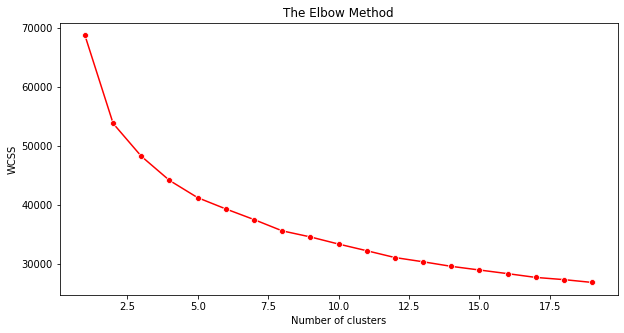

In [34]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 20), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

+ Try k=5

In [35]:
df_array = df_new.to_numpy()

###### Apply KMeans

In [37]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
cluster = kmeans.fit_predict(df_new)

In [44]:
df_new.columns

Index(['10k', 'division', '25k', 'age', 'official', 'genderdiv', '35k',
       'overall', 'pace', '30k', '5k', 'half', '20k', '40k', 'F', 'M', 'AA',
       'AB', 'AE', 'AK', 'AL', 'AP', 'AR', 'AZ', 'BC', 'CA', 'CO', 'CT', 'DC',
       'DE', 'FL', 'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA',
       'MA', 'MB', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NB', 'NC', 'ND',
       'NE', 'NH', 'NJ', 'NL', 'NM', 'NS', 'NT', 'NV', 'NY', 'OH', 'OK', 'ON',
       'OR', 'PA', 'PE', 'PR', 'QC', 'RI', 'SC', 'SD', 'SK', 'TN', 'TX', 'UT',
       'VA', 'VT', 'WA', 'WI', 'WV', 'WY', 'YT', 'g1', 'g2', 'g3', 'g4'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-package

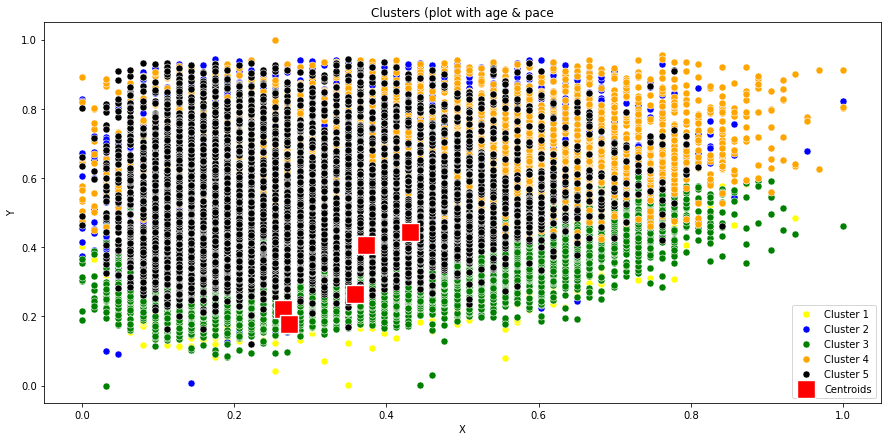

In [45]:
plt.figure(figsize=(15,7))
sns.scatterplot(df_array[cluster == 0, 3], df_array[cluster == 0, 8], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(df_array[cluster == 1, 3], df_array[cluster == 1, 8], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(df_array[cluster == 2, 3], df_array[cluster == 2, 8], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(df_array[cluster == 3, 3], df_array[cluster == 3, 8], color = 'orange', label = 'Cluster 4',s=50)
sns.scatterplot(df_array[cluster == 4, 3], df_array[cluster == 4, 8], color = 'black', label = 'Cluster 5',s=50)
# sns.scatterplot(df_scale[cluster == 5, 0], df_scale[cluster == 5, 1], color = 'tomato', label = 'Cluster 6',s=50)
# sns.scatterplot(df_scale[cluster == 6, 0], df_scale[cluster == 6, 1], color = 'purple', label = 'Cluster 7',s=50)
# sns.scatterplot(df_scale[cluster == 7, 0], df_scale[cluster == 7, 1], color = 'pink', label = 'Cluster 8',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters (plot with age & pace')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [49]:
# calculate silhouette score
silhouette_avg = silhouette_score(df_array,cluster)
each_silhouette_score = silhouette_samples(df_array,cluster,metric="euclidean")
print("silhouette score for Kmeans: " + str(silhouette_avg))

silhouette score for Kmeans: 0.19239518243360593


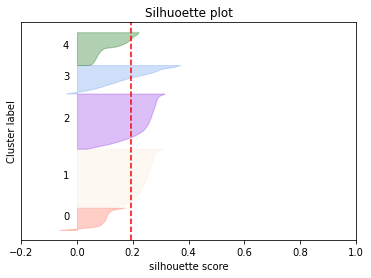

In [50]:
fig =plt.figure()
ax = fig.add_subplot(1,1,1)
y_lower =10
n_clusters=5
colorlist =["tomato","antiquewhite","blueviolet","cornflowerblue","darkgreen","seashell","skyblue","mediumseagreen"]

for i in range(n_clusters):
    ith_cluster_silhouette_values = each_silhouette_score[cluster == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = colorlist[i]
    ax.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.3)
    
    ax.text(-0.05,y_lower + 0.5 * size_cluster_i,str(i))
    
    y_lower = y_upper +10 
    
ax.set_title("Silhuoette plot")
ax.set_xlabel("silhouette score")
ax.set_ylabel("Cluster label")
    
#the vertical line for average silhouette score of all the values
ax.axvline(x=silhouette_avg,color="red",linestyle="--")
    
ax.set_yticks([])
ax.set_xticks([-0.2,0,0.2,0.4,0.6,0.8,1])

#### Kmeans performance is quite low --> try K-Prototypes

In [52]:
df_clone.columns

Index(['10k', 'division', '25k', 'gender', 'age', 'official', 'genderdiv',
       '35k', 'overall', 'pace', 'state', '30k', '5k', 'half', '20k',
       'country', 'city', '40k', 'city_group'],
      dtype='object')

In [88]:
df_clone_new = df_clone.copy()
df_clone_new.drop(['10k','25k','5k','20k','30k','35k','40k','half','city_group'],axis=1, inplace=True)
df_clone_new.columns

Index(['division', 'gender', 'age', 'official', 'genderdiv', 'overall', 'pace',
       'state', 'country', 'city'],
      dtype='object')

In [90]:
kprototype = KPrototypes(n_clusters=5, init='Huang', verbose=1, random_state=42,max_iter=10, n_init=2,n_jobs=-2,gamma=.25) 
cluster_kproto = kprototype.fit_predict(df_clone_new, categorical=[1,7,8,9])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/10, moves: 6008, ncost: 339321265735.7368
Run: 1, iteration: 2/10, moves: 3971, ncost: 298191330742.8339
Run: 1, iteration: 3/10, moves: 2287, ncost: 287624387133.0784
Run: 1, iteration: 4/10, moves: 1228, ncost: 284360654811.95575
Run: 1, iteration: 5/10, moves: 817, ncost: 282699445052.872
Run: 1, iteration: 6/10, moves: 680, ncost: 281651489442.57434
Run: 1, iteration: 7/10, moves: 571, ncost: 280939965602.59595
Run: 1, iteration: 8/10, moves: 486, ncost: 280445667029.144
Run: 1, iteration: 9/10, moves: 430, ncost: 280067602468.6378
Run: 1, iteration: 10/10, moves: 344, ncost: 279827104929.5974
Run: 1, iteration: 11/10, moves: 317, ncost: 279624308288.5548
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/10, moves: 4062, ncost: 304579861145.55853
Run: 2, iteration: 2/10, moves: 1939, ncost: 295881353999.74677
Run: 2, iteration: 3/10

In [92]:
x_num=df_clone_new.drop(columns=["gender","state","country","city"])

In [93]:
labels=kprototype.labels_
silh_kpro=silhouette_score(x_num,labels,metric="euclidean")
print("Silhouette Score - numeric feature : ",silh_kpro)

Silhouette Score - numeric feature :  0.3917472919042738


+ => K-Prototypes get a better performance with higher silhouette score

#### 3. FINDING CHARACTERISTIC

In [94]:
df_clone1 = df_clone.copy()
df_clone1['Cluster']=cluster_kproto
print(df_clone1['Cluster'].value_counts())
df_clone1.head(5)

0    6014
4    5923
2    5923
1    5887
3    5356
Name: Cluster, dtype: int64


,10k,division,25k,gender,age,official,genderdiv,35k,overall,pace,state,30k,5k,half,20k,country,city,40k,city_group,Cluster
9,30.48,20,77.68,M,31.0,137.83,20,112.27,20.0,5.27,CA,94.78,15.15,65.23,61.78,USA,Redding,129.83,g1,3
14,17.12,13,48.88,M,29.0,87.40,13,72.83,13.0,3.35,ON,60.82,8.02,40.20,38.02,CAN,Port Elgin,82.38,g1,3
15,33.93,10,85.03,F,30.0,143.90,10,119.68,46.0,5.50,MI,102.40,16.92,71.68,67.92,USA,Rochester Hills,136.47,g1,3
24,18.30,14,50.33,M,47.0,89.40,14,74.95,14.0,3.42,QC,62.33,8.67,41.80,39.63,CAN,St-Jean Baptiste,84.48,g1,3
27,18.78,15,50.33,M,30.0,89.52,15,75.02,15.0,3.42,IL,62.72,8.98,41.82,39.65,USA,Champaign,84.75,g1,3


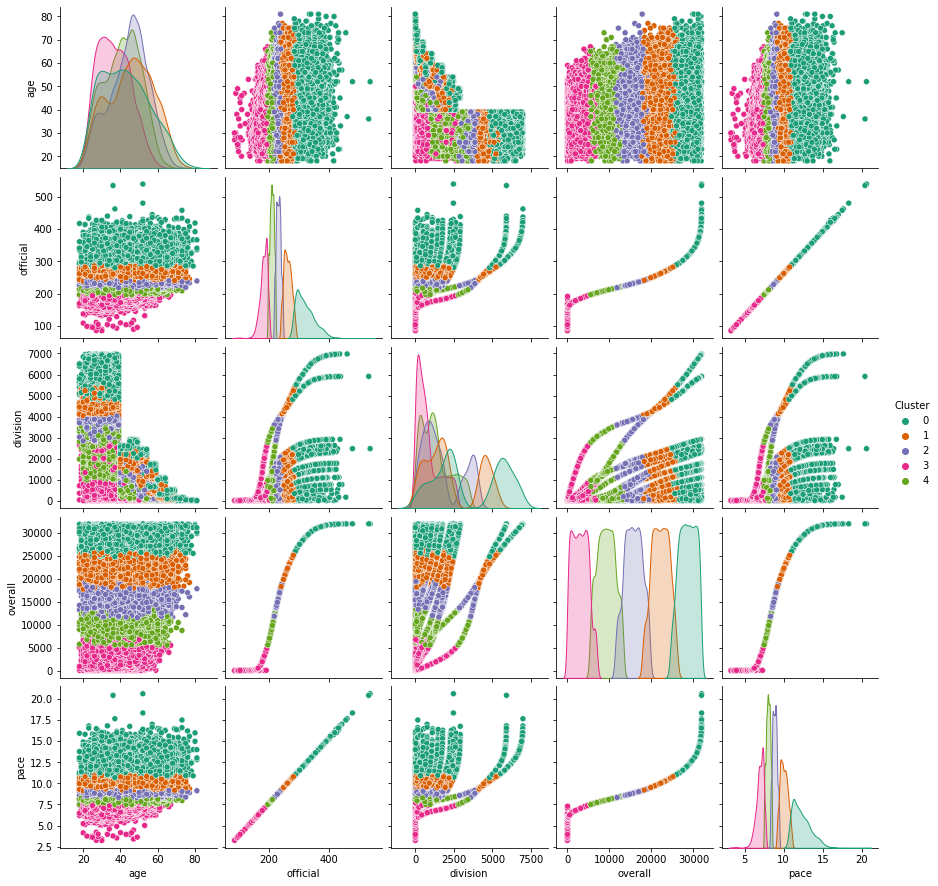

In [99]:
sns.pairplot(df_clone1[["age","official","division",'overall',"pace","Cluster"]],hue='Cluster',palette='Dark2',diag_kind='kde')

In [106]:
df_clone1['age_group'] = df_clone1['age'].apply(lambda x:age_group(x))

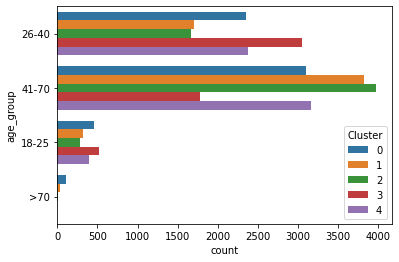

In [114]:
sns.countplot(y=df_clone1['age_group'],hue=df_clone1["Cluster"])

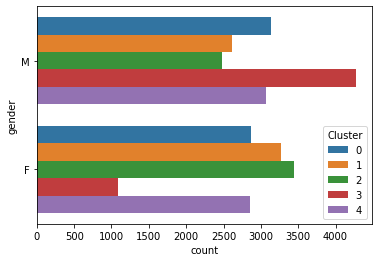

In [115]:
sns.countplot(y=df_clone1['gender'],hue=df_clone1["Cluster"])

In [116]:
df_clone1.columns

Index(['10k', 'division', '25k', 'gender', 'age', 'official', 'genderdiv',
       '35k', 'overall', 'pace', 'state', '30k', '5k', 'half', '20k',
       'country', 'city', '40k', 'city_group', 'Cluster', 'age_group'],
      dtype='object')

In [133]:
df_clone1.groupby('Cluster').agg({'5k': 'mean','10k': 'mean','20k': 'mean','half': 'mean',
                                  '30k': 'mean','35k': 'mean','40k': 'mean','official': 'mean',
                                  'gender': lambda x:mode(x),
                                  'age_group': lambda x:mode(x),
                                  'pace': 'mean',
                                  'city': lambda x:mode(x),
                                  'country': lambda x:mode(x),
                                  'state': lambda x:mode(x)})

,5k,10k,20k,half,30k,35k,40k,official,gender,age_group,pace,city,country,state
Cluster,,,,,,,,,,,,,,
0,31.431728,63.908169,133.636596,141.302759,214.681329,259.976197,303.979054,321.966378,M,41-70,12.288234,Boston,USA,MA
1,27.646919,55.493227,113.052191,119.363839,176.268150,211.542918,247.233238,262.419781,F,41-70,10.017180,Boston,USA,MA
2,25.184282,50.478619,102.191364,107.865004,157.415992,187.572505,218.162428,231.436767,F,41-70,8.835399,Boston,USA,MA
3,20.720291,41.353551,83.019136,87.570183,125.949923,148.639563,171.579507,181.742924,M,26-40,6.939994,New York,USA,MA
4,23.353274,46.735899,94.185779,99.384761,143.919782,170.638433,197.692678,209.558207,M,41-70,8.000900,New York,USA,MA


+ Conclusion:
Cluster 3 is the top runner with pace ~7 - 8.56 km/h. Mode of gender for this group is Male, age from 26 - 40, from NY/ Massachsetts